In [1]:
import pandas as pd
# from tabulate import tabulate

res = pd.read_csv('/home/admin1/Downloads/SAMPLE_VA_DAILY_INVENTORY_2025-01-09.csv')
# print(tabulate(res.head(), headers='keys', tablefmt='psql'))
res.head(2)



,id,vin,date_min,date_max,days_total,listing_stock,listing_price,listing_type,listing_mileage,vehicle_year,...,vehicle_specs_type,vehicle_specs_doors,vehicle_specs_fuel_type,vehicle_specs_engine,vehicle_specs_engine_size,vehicle_specs_engine_cylinders,vehicle_specs_transmission,vehicle_specs_transmission_type,vehicle_specs_transmission_speeds,vehicle_specs_drivetrain
0,6594144194972560000,4T1G11AK3MU559912,2024-12-12,2025-01-10,30,MU559912,18986.0,Used,85940.0,2021,...,Sedan,4-Door,Gasoline,2.5-L L-4 DOHC 16V,2.5,4.0,8-Speed Automatic,Automatic,8-Speed,Front-Wheel Drive
1,4159985458231780000,2HGFE2F56SH514610,2024-08-11,2025-01-09,152,SH514610,27800.0,New,105.0,2025,...,Sedan,5-Door,Gasoline,LFC3,2.0,4.0,NaN,CVT CVT,NaN,Rear-Wheel Drive


In [2]:
res.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535808 entries, 0 to 535807
Data columns (total 73 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 535808 non-null  int64  
 1   vin                                535808 non-null  object 
 2   date_min                           535808 non-null  object 
 3   date_max                           535808 non-null  object 
 4   days_total                         535808 non-null  int64  
 5   listing_stock                      502909 non-null  object 
 6   listing_price                      532862 non-null  float64
 7   listing_type                       535808 non-null  object 
 8   listing_mileage                    496338 non-null  float64
 9   vehicle_year                       535808 non-null  int64  
 10  vehicle_make                       535808 non-null  object 
 11  vehicle_model                      5358

In [3]:
res.shape

(535808, 73)

In [4]:
res.isna().sum()

id                                        0
vin                                       0
date_min                                  0
date_max                                  0
days_total                                0
                                      ...  
vehicle_specs_engine_cylinders         1776
vehicle_specs_transmission            25635
vehicle_specs_transmission_type       49939
vehicle_specs_transmission_speeds    101401
vehicle_specs_drivetrain              12851
Length: 73, dtype: int64

In [5]:
res = res.fillna(0)

In [6]:
res.isna().sum()

id                                   0
vin                                  0
date_min                             0
date_max                             0
days_total                           0
                                    ..
vehicle_specs_engine_cylinders       0
vehicle_specs_transmission           0
vehicle_specs_transmission_type      0
vehicle_specs_transmission_speeds    0
vehicle_specs_drivetrain             0
Length: 73, dtype: int64

In [7]:
res.duplicated().sum()

np.int64(0)

In [8]:
res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535808 entries, 0 to 535807
Data columns (total 73 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 535808 non-null  int64  
 1   vin                                535808 non-null  object 
 2   date_min                           535808 non-null  object 
 3   date_max                           535808 non-null  object 
 4   days_total                         535808 non-null  int64  
 5   listing_stock                      535808 non-null  object 
 6   listing_price                      535808 non-null  float64
 7   listing_type                       535808 non-null  object 
 8   listing_mileage                    535808 non-null  float64
 9   vehicle_year                       535808 non-null  int64  
 10  vehicle_make                       535808 non-null  object 
 11  vehicle_model                      5358

In [9]:
selected_columns = ["listing_price", "listing_mileage", "listing_type", "vehicle_year",
    "days_total", "vehicle_make", "vehicle_style", "vehicle_exterior_color_simple",
    "vehicle_interior_color_simple", "vehicle_fuel_type", "vehicle_transmission_type",
    "vehicle_trim","vehicle_engine_size","vehicle_drivetrain"]

In [10]:
res_selected = res[selected_columns]

In [11]:
res_selected.head()

,listing_price,listing_mileage,listing_type,vehicle_year,days_total,vehicle_make,vehicle_style,vehicle_exterior_color_simple,vehicle_interior_color_simple,vehicle_fuel_type,vehicle_transmission_type,vehicle_trim,vehicle_engine_size,vehicle_drivetrain
0,18986.0,85940.0,Used,2021,30,Toyota,Sedan,white,black,Gasoline,Automatic,SE,2.5,Front-wheel Drive
1,27800.0,105.0,New,2025,152,Honda,Sedan,white,black,Gasoline,Automatic,Sport,0,Front-wheel Drive
2,42718.0,27.0,New,2025,89,Chevrolet,lt 4dr suv,white,other,Electric,Automatic,LT,0,Front-wheel Drive
3,10126.0,67082.0,Used,2020,122,Kia,Sedan,gray,black,Gasoline,Automatic,LXS,.,Front-wheel Drive
4,38670.0,10.0,New,2024,118,Kia,suv,gray,other,Hybrid,Automatic,X-Line,1.6,All-wheel Drive


In [43]:
import json
import os

# Print the number of unique values before conversion
print(f"Unique 'vehicle_trim' values before conversion: {res_selected['vehicle_trim'].nunique()}")

# Convert 'vehicle_trim' values to strings (ensuring no non-string values)
res_selected['vehicle_trim'] = res_selected['vehicle_trim'].astype(str)

# Handle NaN values (if any)
res_selected['vehicle_trim'] = res_selected['vehicle_trim'].replace("nan", "")

# Convert 'vehicle_trim' values to lowercase
res_selected['vehicle_trim'] = res_selected['vehicle_trim'].str.lower()

# Create a mapping of unique vehicle trims to integers
vehicle_trim_mapping = {trim: idx for idx, trim in enumerate(res_selected['vehicle_trim'].unique())}

# Apply the mapping to the 'vehicle_trim' column
res_selected['vehicle_trim'] = res_selected['vehicle_trim'].map(vehicle_trim_mapping)

# Verify the changes and print distinct integer values
distinct_vehicle_trim_count = res_selected['vehicle_trim'].nunique()
print(f"Total distinct integer values in 'vehicle_trim': {distinct_vehicle_trim_count}")

# Define the file path
json_file_path = "/home/admin1/Desktop/SmartAppraisal-TRPT/classes/vehicle_trim.json"

# Ensure the directory exists
os.makedirs(os.path.dirname(json_file_path), exist_ok=True)

# Save the mapping to a JSON file
with open(json_file_path, "w") as json_file:
    json.dump(vehicle_trim_mapping, json_file, indent=4)

print(f"Vehicle trim mapping saved to {json_file_path}")


Unique 'vehicle_trim' values before conversion: 951
Total distinct integer values in 'vehicle_trim': 951
Vehicle trim mapping saved to /home/admin1/Desktop/SmartAppraisal-TRPT/classes/vehicle_trim.json


In [16]:
res_selected.head()

,listing_price,listing_mileage,listing_type,vehicle_year,days_total,vehicle_make,vehicle_style,vehicle_exterior_color_simple,vehicle_interior_color_simple,vehicle_fuel_type,vehicle_transmission_type,vehicle_trim,vehicle_engine_size,vehicle_drivetrain
0,18986.0,85940.0,Used,2021,30,Toyota,Sedan,white,black,Gasoline,Automatic,0,2.5,Front-wheel Drive
1,27800.0,105.0,New,2025,152,Honda,Sedan,white,black,Gasoline,Automatic,1,0,Front-wheel Drive
2,42718.0,27.0,New,2025,89,Chevrolet,lt 4dr suv,white,other,Electric,Automatic,2,0,Front-wheel Drive
3,10126.0,67082.0,Used,2020,122,Kia,Sedan,gray,black,Gasoline,Automatic,3,.,Front-wheel Drive
4,38670.0,10.0,New,2024,118,Kia,suv,gray,other,Hybrid,Automatic,4,1.6,All-wheel Drive


In [15]:
# import numpy as np

# # Replace non-numeric values (like '.') with NaN
# res_selected.loc[:, 'vehicle_engine_size'] = pd.to_numeric(res_selected['vehicle_engine_size'], errors='coerce')

# # Fill NaN values with 0 (or use another strategy like mean/median)
# res_selected.loc[:, 'vehicle_engine_size'] = res_selected['vehicle_engine_size'].fillna(0)

# # Convert to float, apply floor, and cast to int
# res_selected.loc[:, 'vehicle_engine_size'] = np.floor(res_selected['vehicle_engine_size']).astype(int)

import numpy as np


# Replace non-numeric values (like '.') with NaN
res_selected.loc[:, 'vehicle_engine_size'] = pd.to_numeric(res_selected['vehicle_engine_size'], errors='coerce')

# Fill NaN values with 0 (or use another strategy like mean/median)
res_selected.loc[:, 'vehicle_engine_size'] = res_selected['vehicle_engine_size'].fillna(0)

# Convert to float, apply floor, and cast to int
res_selected.loc[:, 'vehicle_engine_size'] = np.floor(res_selected['vehicle_engine_size']).astype(int)

# Create a mapping of unique vehicle engine sizes to integers
vehicle_engine_size_mapping = {size: idx for idx, size in enumerate(res_selected['vehicle_engine_size'].unique())}

# Apply the mapping to the 'vehicle_engine_size' column
res_selected.loc[:, 'vehicle_engine_size'] = res_selected['vehicle_engine_size'].map(vehicle_engine_size_mapping)

# Verify the changes and print distinct integer values
distinct_engine_size_count = res_selected['vehicle_engine_size'].nunique()
print(f"Total distinct integer values in 'vehicle_engine_size': {distinct_engine_size_count}")

# Define the file path
json_file_path = "/home/admin1/Desktop/SmartAppraisal-TRPT/classes/vehicle_engine_size.json"

# Ensure the directory exists
os.makedirs(os.path.dirname(json_file_path), exist_ok=True)

# Save the mapping to a JSON file
with open(json_file_path, "w") as json_file:
    json.dump(vehicle_engine_size_mapping, json_file, indent=4)

print(f"Vehicle engine size mapping saved to {json_file_path}")



/tmp/ipykernel_8629/1073782804.py:19: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  res_selected.loc[:, 'vehicle_engine_size'] = res_selected['vehicle_engine_size'].fillna(0)


Total distinct integer values in 'vehicle_engine_size': 145
Vehicle engine size mapping saved to /home/admin1/Desktop/SmartAppraisal-TRPT/classes/vehicle_engine_size.json


In [18]:
res_selected.head()

,listing_price,listing_mileage,listing_type,vehicle_year,days_total,vehicle_make,vehicle_style,vehicle_exterior_color_simple,vehicle_interior_color_simple,vehicle_fuel_type,vehicle_transmission_type,vehicle_trim,vehicle_engine_size,vehicle_drivetrain
0,18986.0,85940.0,Used,2021,30,Toyota,Sedan,white,black,Gasoline,Automatic,0,2,Front-wheel Drive
1,27800.0,105.0,New,2025,152,Honda,Sedan,white,black,Gasoline,Automatic,1,0,Front-wheel Drive
2,42718.0,27.0,New,2025,89,Chevrolet,lt 4dr suv,white,other,Electric,Automatic,2,0,Front-wheel Drive
3,10126.0,67082.0,Used,2020,122,Kia,Sedan,gray,black,Gasoline,Automatic,3,0,Front-wheel Drive
4,38670.0,10.0,New,2024,118,Kia,suv,gray,other,Hybrid,Automatic,4,1,All-wheel Drive


In [16]:
# print(res_selected['vehicle_drivetrain'].nunique())

# # Convert 'vehicle_drivetrain' values to lowercase after ensuring they are strings
# res_selected.loc[:, 'vehicle_drivetrain'] = res_selected['vehicle_drivetrain'].astype(str).str.lower()

# # Create a mapping of unique vehicle_drivetrain values to integers
# vehicle_drivetrain_mapping = {make: idx for idx, make in enumerate(res_selected['vehicle_drivetrain'].unique())}

# # Apply the mapping to the 'vehicle_drivetrain' column
# res_selected.loc[:, 'vehicle_drivetrain'] = res_selected['vehicle_drivetrain'].map(vehicle_drivetrain_mapping)

# # Verify the changes and print distinct integer values
# vehicle_drivetrain_count = res_selected['vehicle_drivetrain'].nunique()
# print(f"Total distinct integer values in 'vehicle_drivetrain': {vehicle_drivetrain_count}")


# Print the number of unique values before conversion
print(res_selected['vehicle_drivetrain'].nunique())

# Convert 'vehicle_drivetrain' values to lowercase after ensuring they are strings
res_selected.loc[:, 'vehicle_drivetrain'] = res_selected['vehicle_drivetrain'].astype(str).str.lower()

# Create a mapping of unique vehicle_drivetrain values to integers
vehicle_drivetrain_mapping = {drivetrain: idx for idx, drivetrain in enumerate(res_selected['vehicle_drivetrain'].unique())}

# Apply the mapping to the 'vehicle_drivetrain' column
res_selected.loc[:, 'vehicle_drivetrain'] = res_selected['vehicle_drivetrain'].map(vehicle_drivetrain_mapping)

# Verify the changes and print distinct integer values
vehicle_drivetrain_count = res_selected['vehicle_drivetrain'].nunique()
print(f"Total distinct integer values in 'vehicle_drivetrain': {vehicle_drivetrain_count}")

# Define the file path
json_file_path = "/home/admin1/Desktop/SmartAppraisal-TRPT/classes/vehicle_drivetrain.json"

# Ensure the directory exists
os.makedirs(os.path.dirname(json_file_path), exist_ok=True)

# Save the mapping to a JSON file
with open(json_file_path, "w") as json_file:
    json.dump(vehicle_drivetrain_mapping, json_file, indent=4)

print(f"Vehicle drivetrain mapping saved to {json_file_path}")


72
Total distinct integer values in 'vehicle_drivetrain': 68
Vehicle drivetrain mapping saved to /home/admin1/Desktop/SmartAppraisal-TRPT/classes/vehicle_drivetrain.json


In [20]:
res_selected.head()

,listing_price,listing_mileage,listing_type,vehicle_year,days_total,vehicle_make,vehicle_style,vehicle_exterior_color_simple,vehicle_interior_color_simple,vehicle_fuel_type,vehicle_transmission_type,vehicle_trim,vehicle_engine_size,vehicle_drivetrain
0,18986.0,85940.0,Used,2021,30,Toyota,Sedan,white,black,Gasoline,Automatic,0,2,0
1,27800.0,105.0,New,2025,152,Honda,Sedan,white,black,Gasoline,Automatic,1,0,0
2,42718.0,27.0,New,2025,89,Chevrolet,lt 4dr suv,white,other,Electric,Automatic,2,0,0
3,10126.0,67082.0,Used,2020,122,Kia,Sedan,gray,black,Gasoline,Automatic,3,0,0
4,38670.0,10.0,New,2024,118,Kia,suv,gray,other,Hybrid,Automatic,4,1,1


In [17]:
# Using .loc[] to avoid SettingWithCopyWarning and modify the original data
res_selected.loc[:, 'listing_type'] = res_selected['listing_type'].str.lower()

# Map the 'listing_type' string values to integers
listing_type_mapping = {'used': 1, 'new': 2, 'certified': 3}
res_selected.loc[:, 'listing_type'] = res_selected['listing_type'].map(listing_type_mapping)

# Get distinct integer values (now modified in original data)
distinct_values = res_selected['listing_type'].unique()
print(f"Distinct integer values in 'listing_type': {distinct_values}")

# Define the file path
json_file_path = "/home/admin1/Desktop/SmartAppraisal-TRPT/classes/listing_type.json"

# Ensure the directory exists
os.makedirs(os.path.dirname(json_file_path), exist_ok=True)

# Save the mapping to a JSON file
with open(json_file_path, "w") as json_file:
    json.dump(listing_type_mapping, json_file, indent=4)

print(f"Listing type mapping saved to {json_file_path}")

Distinct integer values in 'listing_type': [1 2 3]
Listing type mapping saved to /home/admin1/Desktop/SmartAppraisal-TRPT/classes/listing_type.json


In [22]:
res_selected.head()

,listing_price,listing_mileage,listing_type,vehicle_year,days_total,vehicle_make,vehicle_style,vehicle_exterior_color_simple,vehicle_interior_color_simple,vehicle_fuel_type,vehicle_transmission_type,vehicle_trim,vehicle_engine_size,vehicle_drivetrain
0,18986.0,85940.0,1,2021,30,Toyota,Sedan,white,black,Gasoline,Automatic,0,2,0
1,27800.0,105.0,2,2025,152,Honda,Sedan,white,black,Gasoline,Automatic,1,0,0
2,42718.0,27.0,2,2025,89,Chevrolet,lt 4dr suv,white,other,Electric,Automatic,2,0,0
3,10126.0,67082.0,1,2020,122,Kia,Sedan,gray,black,Gasoline,Automatic,3,0,0
4,38670.0,10.0,2,2024,118,Kia,suv,gray,other,Hybrid,Automatic,4,1,1


In [18]:
# # Convert 'vehicle_make' values to lowercase
# res_selected.loc[:, 'vehicle_make'] = res_selected['vehicle_make'].str.lower()

# # Create a mapping of unique vehicle makes to integers
# vehicle_make_mapping = {make: idx for idx, make in enumerate(res_selected['vehicle_make'].unique())}

# # Apply the mapping to the 'vehicle_make' column
# res_selected.loc[:, 'vehicle_make'] = res_selected['vehicle_make'].map(vehicle_make_mapping)

# # Verify the changes and print distinct integer values
# distinct_vehicle_make_count = res_selected['vehicle_make'].nunique()
# print(f"Total distinct integer values in 'vehicle_make': {distinct_vehicle_make_count}")


#  Convert 'vehicle_make' values to lowercase
res_selected.loc[:, 'vehicle_make'] = res_selected['vehicle_make'].str.lower()

# Create a mapping of unique vehicle makes to integers
vehicle_make_mapping = {make: idx for idx, make in enumerate(res_selected['vehicle_make'].unique())}

# Apply the mapping to the 'vehicle_make' column
res_selected.loc[:, 'vehicle_make'] = res_selected['vehicle_make'].map(vehicle_make_mapping)

# Verify the changes and print distinct integer values
distinct_vehicle_make_count = res_selected['vehicle_make'].nunique()
print(f"Total distinct integer values in 'vehicle_make': {distinct_vehicle_make_count}")

# Define the file path
json_file_path = "/home/admin1/Desktop/SmartAppraisal-TRPT/classes/vehicle_make.json"

# Ensure the directory exists
os.makedirs(os.path.dirname(json_file_path), exist_ok=True)

# Save the mapping to a JSON file
with open(json_file_path, "w") as json_file:
    json.dump(vehicle_make_mapping, json_file, indent=4)

print(f"Vehicle make mapping saved to {json_file_path}")

Total distinct integer values in 'vehicle_make': 163
Vehicle make mapping saved to /home/admin1/Desktop/SmartAppraisal-TRPT/classes/vehicle_make.json


In [24]:
res_selected.head()

,listing_price,listing_mileage,listing_type,vehicle_year,days_total,vehicle_make,vehicle_style,vehicle_exterior_color_simple,vehicle_interior_color_simple,vehicle_fuel_type,vehicle_transmission_type,vehicle_trim,vehicle_engine_size,vehicle_drivetrain
0,18986.0,85940.0,1,2021,30,0,Sedan,white,black,Gasoline,Automatic,0,2,0
1,27800.0,105.0,2,2025,152,1,Sedan,white,black,Gasoline,Automatic,1,0,0
2,42718.0,27.0,2,2025,89,2,lt 4dr suv,white,other,Electric,Automatic,2,0,0
3,10126.0,67082.0,1,2020,122,3,Sedan,gray,black,Gasoline,Automatic,3,0,0
4,38670.0,10.0,2,2024,118,3,suv,gray,other,Hybrid,Automatic,4,1,1


In [20]:
# # Convert 'vehicle_style' values to strings (if they are not already)
# res_selected.loc[:, 'vehicle_style'] = res_selected['vehicle_style'].astype(str)

# # Convert 'vehicle_style' values to lowercase
# res_selected.loc[:, 'vehicle_style'] = res_selected['vehicle_style'].str.lower()

# # Create a mapping of unique vehicle styles to integers
# vehicle_style_mapping = {style: idx for idx, style in enumerate(res_selected['vehicle_style'].unique())}

# # Apply the mapping to the 'vehicle_style' column
# res_selected.loc[:, 'vehicle_style'] = res_selected['vehicle_style'].map(vehicle_style_mapping)

# # Verify the changes and print distinct integer values
# distinct_vehicle_style_mapping_count = res_selected['vehicle_style'].nunique()
# print(f"Total distinct integer values in 'vehicle_style': {distinct_vehicle_style_mapping_count}")

# import json
# import os

# Convert 'vehicle_style' values to strings (if they are not already)
res_selected.loc[:, 'vehicle_style'] = res_selected['vehicle_style'].astype(str)

# Convert 'vehicle_style' values to lowercase
res_selected.loc[:, 'vehicle_style'] = res_selected['vehicle_style'].str.lower()

# Create a mapping of unique vehicle styles to integers
vehicle_style_mapping = {style: idx for idx, style in enumerate(res_selected['vehicle_style'].unique())}

# Apply the mapping to the 'vehicle_style' column
res_selected.loc[:, 'vehicle_style'] = res_selected['vehicle_style'].map(vehicle_style_mapping)

# Verify the changes and print distinct integer values
distinct_vehicle_style_mapping_count = res_selected['vehicle_style'].nunique()
print(f"Total distinct integer values in 'vehicle_style': {distinct_vehicle_style_mapping_count}")

# Define the file path
json_file_path = "/home/admin1/Desktop/SmartAppraisal-TRPT/classes/vehicle_style.json"

# Ensure the directory exists
os.makedirs(os.path.dirname(json_file_path), exist_ok=True)

# Save the mapping to a JSON file
with open(json_file_path, "w") as json_file:
    json.dump(vehicle_style_mapping, json_file, indent=4)

print(f"Vehicle style mapping saved to {json_file_path}")



Total distinct integer values in 'vehicle_style': 15803
Vehicle style mapping saved to /home/admin1/Desktop/SmartAppraisal-TRPT/classes/vehicle_style.json


In [21]:
# # Convert 'vehicle_style' values to strings (if they are not already)
# res_selected.loc[:, 'vehicle_make'] = res_selected['vehicle_make'].astype(str)

# # Convert 'vehicle_style' values to lowercase
# res_selected.loc[:, 'vehicle_make'] = res_selected['vehicle_make'].str.lower()

# # Create a mapping of unique vehicle styles to integers
# vehicle_make_mapping = {style: idx for idx, style in enumerate(res_selected['vehicle_make'].unique())}

# # Apply the mapping to the 'vehicle_style' column
# res_selected.loc[:, 'vehicle_make'] = res_selected['vehicle_make'].map(vehicle_make_mapping)

# # Verify the changes and print distinct integer values
# distinct_vehicle_make_mapping_count = res_selected['vehicle_make'].nunique()
# print(f"Total distinct integer values in 'vehicle_style': {distinct_vehicle_make_mapping_count}")
# import json
# import os

# Convert 'vehicle_make' values to strings (if they are not already)
res_selected.loc[:, 'vehicle_make'] = res_selected['vehicle_make'].astype(str)

# Convert 'vehicle_make' values to lowercase
res_selected.loc[:, 'vehicle_make'] = res_selected['vehicle_make'].str.lower()

# Create a mapping of unique vehicle makes to integers
vehicle_make_mapping = {make: idx for idx, make in enumerate(res_selected['vehicle_make'].unique())}

# Apply the mapping to the 'vehicle_make' column
res_selected.loc[:, 'vehicle_make'] = res_selected['vehicle_make'].map(vehicle_make_mapping)

# Verify the changes and print distinct integer values
distinct_vehicle_make_mapping_count = res_selected['vehicle_make'].nunique()
print(f"Total distinct integer values in 'vehicle_make': {distinct_vehicle_make_mapping_count}")

# Define the file path
json_file_path = "/home/admin1/Desktop/SmartAppraisal-TRPT/classes/vehicle_make.json"

# Ensure the directory exists
os.makedirs(os.path.dirname(json_file_path), exist_ok=True)

# Save the mapping to a JSON file
with open(json_file_path, "w") as json_file:
    json.dump(vehicle_make_mapping, json_file, indent=4)

print(f"Vehicle make mapping saved to {json_file_path}")


Total distinct integer values in 'vehicle_make': 163
Vehicle make mapping saved to /home/admin1/Desktop/SmartAppraisal-TRPT/classes/vehicle_make.json


In [27]:
res_selected.head(10)

,listing_price,listing_mileage,listing_type,vehicle_year,days_total,vehicle_make,vehicle_style,vehicle_exterior_color_simple,vehicle_interior_color_simple,vehicle_fuel_type,vehicle_transmission_type,vehicle_trim,vehicle_engine_size,vehicle_drivetrain
0,18986.0,85940.0,1,2021,30,0,0,white,black,Gasoline,Automatic,0,2,0
1,27800.0,105.0,2,2025,152,1,0,white,black,Gasoline,Automatic,1,0,0
2,42718.0,27.0,2,2025,89,2,1,white,other,Electric,Automatic,2,0,0
3,10126.0,67082.0,1,2020,122,3,0,gray,black,Gasoline,Automatic,3,0,0
4,38670.0,10.0,2,2024,118,3,2,gray,other,Hybrid,Automatic,4,1,1
5,68225.0,12.0,2,2025,127,4,3,white,other,Gasoline,Automatic,5,3,1
6,57442.0,11870.0,1,2023,21,0,4,other,beige,Gasoline,Automatic,6,3,2
7,13998.0,102017.0,1,2016,72,5,5,blue,beige,Gasoline,Automatic,7,3,1
8,67320.0,2.0,2,2025,70,6,6,gray,brown,Gasoline,Automatic,8,2,3
9,27990.0,42026.0,1,2022,211,7,3,white,black,Gasoline,Automatic,9,0,1


In [22]:
# # Convert 'vehicle_exterior_color_simple' values to strings (if they are not already)
# res_selected.loc[:, 'vehicle_exterior_color_simple'] = res_selected['vehicle_exterior_color_simple'].astype(str)

# # Convert 'vehicle_exterior_color_simple' values to lowercase
# res_selected.loc[:, 'vehicle_exterior_color_simple'] = res_selected['vehicle_exterior_color_simple'].str.lower()

# # Create a mapping of unique vehicle exterior colors to integers
# vehicle_exterior_color_simple_mapping = {color: idx for idx, color in enumerate(res_selected['vehicle_exterior_color_simple'].unique())}

# # Apply the mapping to the 'vehicle_exterior_color_simple' column
# res_selected.loc[:, 'vehicle_exterior_color_simple'] = res_selected['vehicle_exterior_color_simple'].map(vehicle_exterior_color_simple_mapping)

# # Verify the changes and print distinct integer values
# distinct_vehicle_exterior_color_simple_mapping_count = res_selected['vehicle_exterior_color_simple'].nunique()
# print(f"Total distinct integer values in 'vehicle_exterior_color_simple': {distinct_vehicle_exterior_color_simple_mapping_count}")
res_selected.loc[:, 'vehicle_exterior_color_simple'] = res_selected['vehicle_exterior_color_simple'].astype(str)

# Convert 'vehicle_exterior_color_simple' values to lowercase
res_selected.loc[:, 'vehicle_exterior_color_simple'] = res_selected['vehicle_exterior_color_simple'].str.lower()

# Create a mapping of unique vehicle exterior colors to integers
vehicle_exterior_color_simple_mapping = {color: idx for idx, color in enumerate(res_selected['vehicle_exterior_color_simple'].unique())}

# Apply the mapping to the 'vehicle_exterior_color_simple' column
res_selected.loc[:, 'vehicle_exterior_color_simple'] = res_selected['vehicle_exterior_color_simple'].map(vehicle_exterior_color_simple_mapping)

# Verify the changes and print distinct integer values
distinct_vehicle_exterior_color_simple_mapping_count = res_selected['vehicle_exterior_color_simple'].nunique()
print(f"Total distinct integer values in 'vehicle_exterior_color_simple': {distinct_vehicle_exterior_color_simple_mapping_count}")

# Define the file path
json_file_path = "/home/admin1/Desktop/SmartAppraisal-TRPT/classes/vehicle_exterior_color_simple.json"

# Ensure the directory exists
os.makedirs(os.path.dirname(json_file_path), exist_ok=True)

# Save the mapping to a JSON file
with open(json_file_path, "w") as json_file:
    json.dump(vehicle_exterior_color_simple_mapping, json_file, indent=4)

print(f"Vehicle exterior color mapping saved to {json_file_path}")

Total distinct integer values in 'vehicle_exterior_color_simple': 15
Vehicle exterior color mapping saved to /home/admin1/Desktop/SmartAppraisal-TRPT/classes/vehicle_exterior_color_simple.json


In [29]:
res_selected.head(10)

,listing_price,listing_mileage,listing_type,vehicle_year,days_total,vehicle_make,vehicle_style,vehicle_exterior_color_simple,vehicle_interior_color_simple,vehicle_fuel_type,vehicle_transmission_type,vehicle_trim,vehicle_engine_size,vehicle_drivetrain
0,18986.0,85940.0,1,2021,30,0,0,0,black,Gasoline,Automatic,0,2,0
1,27800.0,105.0,2,2025,152,1,0,0,black,Gasoline,Automatic,1,0,0
2,42718.0,27.0,2,2025,89,2,1,0,other,Electric,Automatic,2,0,0
3,10126.0,67082.0,1,2020,122,3,0,1,black,Gasoline,Automatic,3,0,0
4,38670.0,10.0,2,2024,118,3,2,1,other,Hybrid,Automatic,4,1,1
5,68225.0,12.0,2,2025,127,4,3,0,other,Gasoline,Automatic,5,3,1
6,57442.0,11870.0,1,2023,21,0,4,2,beige,Gasoline,Automatic,6,3,2
7,13998.0,102017.0,1,2016,72,5,5,3,beige,Gasoline,Automatic,7,3,1
8,67320.0,2.0,2,2025,70,6,6,1,brown,Gasoline,Automatic,8,2,3
9,27990.0,42026.0,1,2022,211,7,3,0,black,Gasoline,Automatic,9,0,1


In [23]:
# # Convert 'vehicle_exterior_color_simple' values to strings (if they are not already)
# res_selected.loc[:, 'vehicle_interior_color_simple'] = res_selected['vehicle_interior_color_simple'].astype(str)

# # Convert 'vehicle_exterior_color_simple' values to lowercase
# res_selected.loc[:, 'vehicle_interior_color_simple'] = res_selected['vehicle_interior_color_simple'].str.lower()

# # Create a mapping of unique vehicle exterior colors to integers
# vehicle_interior_color_simple_mapping = {color: idx for idx, color in enumerate(res_selected['vehicle_interior_color_simple'].unique())}

# # Apply the mapping to the 'vehicle_exterior_color_simple' column
# res_selected.loc[:, 'vehicle_interior_color_simple'] = res_selected['vehicle_interior_color_simple'].map(vehicle_interior_color_simple_mapping)

# # Verify the changes and print distinct integer values
# distinct_vehicle_interior_color_simple_count = res_selected['vehicle_interior_color_simple'].nunique()
# print(f"Total distinct integer values in 'vehicle_exterior_color_simple': {distinct_vehicle_interior_color_simple_count}")
import json
import os

# Convert 'vehicle_interior_color_simple' values to strings (if they are not already)
res_selected.loc[:, 'vehicle_interior_color_simple'] = res_selected['vehicle_interior_color_simple'].astype(str)

# Convert 'vehicle_interior_color_simple' values to lowercase
res_selected.loc[:, 'vehicle_interior_color_simple'] = res_selected['vehicle_interior_color_simple'].str.lower()

# Create a mapping of unique vehicle interior colors to integers
vehicle_interior_color_simple_mapping = {color: idx for idx, color in enumerate(res_selected['vehicle_interior_color_simple'].unique())}

# Apply the mapping to the 'vehicle_interior_color_simple' column
res_selected.loc[:, 'vehicle_interior_color_simple'] = res_selected['vehicle_interior_color_simple'].map(vehicle_interior_color_simple_mapping)

# Verify the changes and print distinct integer values
distinct_vehicle_interior_color_simple_count = res_selected['vehicle_interior_color_simple'].nunique()
print(f"Total distinct integer values in 'vehicle_interior_color_simple': {distinct_vehicle_interior_color_simple_count}")

# Define the file path
json_file_path = "/home/admin1/Desktop/SmartAppraisal-TRPT/classes/vehicle_interior_color_simple.json"

# Ensure the directory exists
os.makedirs(os.path.dirname(json_file_path), exist_ok=True)

# Save the mapping to a JSON file
with open(json_file_path, "w") as json_file:
    json.dump(vehicle_interior_color_simple_mapping, json_file, indent=4)

print(f"Vehicle interior color mapping saved to {json_file_path}")


Total distinct integer values in 'vehicle_interior_color_simple': 12
Vehicle interior color mapping saved to /home/admin1/Desktop/SmartAppraisal-TRPT/classes/vehicle_interior_color_simple.json


In [31]:
res_selected.head(10)

,listing_price,listing_mileage,listing_type,vehicle_year,days_total,vehicle_make,vehicle_style,vehicle_exterior_color_simple,vehicle_interior_color_simple,vehicle_fuel_type,vehicle_transmission_type,vehicle_trim,vehicle_engine_size,vehicle_drivetrain
0,18986.0,85940.0,1,2021,30,0,0,0,0,Gasoline,Automatic,0,2,0
1,27800.0,105.0,2,2025,152,1,0,0,0,Gasoline,Automatic,1,0,0
2,42718.0,27.0,2,2025,89,2,1,0,1,Electric,Automatic,2,0,0
3,10126.0,67082.0,1,2020,122,3,0,1,0,Gasoline,Automatic,3,0,0
4,38670.0,10.0,2,2024,118,3,2,1,1,Hybrid,Automatic,4,1,1
5,68225.0,12.0,2,2025,127,4,3,0,1,Gasoline,Automatic,5,3,1
6,57442.0,11870.0,1,2023,21,0,4,2,2,Gasoline,Automatic,6,3,2
7,13998.0,102017.0,1,2016,72,5,5,3,2,Gasoline,Automatic,7,3,1
8,67320.0,2.0,2,2025,70,6,6,1,3,Gasoline,Automatic,8,2,3
9,27990.0,42026.0,1,2022,211,7,3,0,0,Gasoline,Automatic,9,0,1


In [24]:
# # Convert 'vehicle_fuel_type' values to strings (if they are not already)
# res_selected.loc[:, 'vehicle_fuel_type'] = res_selected['vehicle_fuel_type'].astype(str)

# # Convert 'vehicle_fuel_type' values to lowercase
# res_selected.loc[:, 'vehicle_fuel_type'] = res_selected['vehicle_fuel_type'].str.lower()

# # Create a mapping of unique fuel types to integers
# vehicle_fuel_type_mapping = {fuel_type: idx for idx, fuel_type in enumerate(res_selected['vehicle_fuel_type'].unique())}

# # Apply the mapping to the 'vehicle_fuel_type' column
# res_selected.loc[:, 'vehicle_fuel_type'] = res_selected['vehicle_fuel_type'].map(vehicle_fuel_type_mapping)

# # Verify the changes and print distinct integer values
# distinct_vehicle_fuel_type_mapping = res_selected['vehicle_fuel_type'].nunique()
# print(f"Total distinct integer values in 'vehicle_fuel_type': {distinct_vehicle_fuel_type_mapping}")

res_selected.loc[:, 'vehicle_fuel_type'] = res_selected['vehicle_fuel_type'].astype(str)

# Convert 'vehicle_fuel_type' values to lowercase
res_selected.loc[:, 'vehicle_fuel_type'] = res_selected['vehicle_fuel_type'].str.lower()

# Create a mapping of unique fuel types to integers
vehicle_fuel_type_mapping = {fuel_type: idx for idx, fuel_type in enumerate(res_selected['vehicle_fuel_type'].unique())}

# Apply the mapping to the 'vehicle_fuel_type' column
res_selected.loc[:, 'vehicle_fuel_type'] = res_selected['vehicle_fuel_type'].map(vehicle_fuel_type_mapping)

# Verify the changes and print distinct integer values
distinct_vehicle_fuel_type_mapping = res_selected['vehicle_fuel_type'].nunique()
print(f"Total distinct integer values in 'vehicle_fuel_type': {distinct_vehicle_fuel_type_mapping}")

# Define the file path
json_file_path = "/home/admin1/Desktop/SmartAppraisal-TRPT/classes/vehicle_fuel_type.json"

# Ensure the directory exists
os.makedirs(os.path.dirname(json_file_path), exist_ok=True)

# Save the mapping to a JSON file
with open(json_file_path, "w") as json_file:
    json.dump(vehicle_fuel_type_mapping, json_file, indent=4)

print(f"Vehicle fuel type mapping saved to {json_file_path}")

Total distinct integer values in 'vehicle_fuel_type': 94
Vehicle fuel type mapping saved to /home/admin1/Desktop/SmartAppraisal-TRPT/classes/vehicle_fuel_type.json


In [33]:
res_selected.head(10)

,listing_price,listing_mileage,listing_type,vehicle_year,days_total,vehicle_make,vehicle_style,vehicle_exterior_color_simple,vehicle_interior_color_simple,vehicle_fuel_type,vehicle_transmission_type,vehicle_trim,vehicle_engine_size,vehicle_drivetrain
0,18986.0,85940.0,1,2021,30,0,0,0,0,0,Automatic,0,2,0
1,27800.0,105.0,2,2025,152,1,0,0,0,0,Automatic,1,0,0
2,42718.0,27.0,2,2025,89,2,1,0,1,1,Automatic,2,0,0
3,10126.0,67082.0,1,2020,122,3,0,1,0,0,Automatic,3,0,0
4,38670.0,10.0,2,2024,118,3,2,1,1,2,Automatic,4,1,1
5,68225.0,12.0,2,2025,127,4,3,0,1,0,Automatic,5,3,1
6,57442.0,11870.0,1,2023,21,0,4,2,2,0,Automatic,6,3,2
7,13998.0,102017.0,1,2016,72,5,5,3,2,0,Automatic,7,3,1
8,67320.0,2.0,2,2025,70,6,6,1,3,0,Automatic,8,2,3
9,27990.0,42026.0,1,2022,211,7,3,0,0,0,Automatic,9,0,1


In [25]:
# # Convert 'vehicle_fuel_type' values to strings (if they are not already)
# res_selected.loc[:, 'vehicle_transmission_type'] = res_selected['vehicle_transmission_type'].astype(str)

# # Convert 'vehicle_fuel_type' values to lowercase
# res_selected.loc[:, 'vehicle_transmission_type'] = res_selected['vehicle_transmission_type'].str.lower()

# # Create a mapping of unique fuel types to integers
# vehicle_transmission_type_mapping = {fuel_type: idx for idx, fuel_type in enumerate(res_selected['vehicle_transmission_type'].unique())}

# # Apply the mapping to the 'vehicle_fuel_type' column
# res_selected.loc[:, 'vehicle_transmission_type'] = res_selected['vehicle_transmission_type'].map(vehicle_transmission_type_mapping)

# # Verify the changes and print distinct integer values
# distinct_vehicle_transmission_type_mapping = res_selected['vehicle_transmission_type'].nunique()
# print(f"Total distinct integer values in 'vehicle_fuel_type': {distinct_vehicle_transmission_type_mapping}")
import json
import os

# Convert 'vehicle_transmission_type' values to strings (if they are not already)
res_selected.loc[:, 'vehicle_transmission_type'] = res_selected['vehicle_transmission_type'].astype(str)

# Convert 'vehicle_transmission_type' values to lowercase
res_selected.loc[:, 'vehicle_transmission_type'] = res_selected['vehicle_transmission_type'].str.lower()

# Create a mapping of unique transmission types to integers
vehicle_transmission_type_mapping = {trans_type: idx for idx, trans_type in enumerate(res_selected['vehicle_transmission_type'].unique())}

# Apply the mapping to the 'vehicle_transmission_type' column
res_selected.loc[:, 'vehicle_transmission_type'] = res_selected['vehicle_transmission_type'].map(vehicle_transmission_type_mapping)

# Verify the changes and print distinct integer values
distinct_vehicle_transmission_type_mapping = res_selected['vehicle_transmission_type'].nunique()
print(f"Total distinct integer values in 'vehicle_transmission_type': {distinct_vehicle_transmission_type_mapping}")

# Define the file path
json_file_path = "/home/admin1/Desktop/SmartAppraisal-TRPT/classes/vehicle_transmission_type.json"

# Ensure the directory exists
os.makedirs(os.path.dirname(json_file_path), exist_ok=True)

# Save the mapping to a JSON file
with open(json_file_path, "w") as json_file:
    json.dump(vehicle_transmission_type_mapping, json_file, indent=4)

print(f"Vehicle transmission type mapping saved to {json_file_path}")



Total distinct integer values in 'vehicle_transmission_type': 3
Vehicle transmission type mapping saved to /home/admin1/Desktop/SmartAppraisal-TRPT/classes/vehicle_transmission_type.json


In [26]:
res_selected.head(30)

,listing_price,listing_mileage,listing_type,vehicle_year,days_total,vehicle_make,vehicle_style,vehicle_exterior_color_simple,vehicle_interior_color_simple,vehicle_fuel_type,vehicle_transmission_type,vehicle_trim,vehicle_engine_size,vehicle_drivetrain
0,18986.0,85940.0,1,2021,30,0,0,0,0,0,0,0,0,0
1,27800.0,105.0,2,2025,152,1,0,0,0,0,0,1,1,0
2,42718.0,27.0,2,2025,89,2,1,0,1,1,0,2,1,0
3,10126.0,67082.0,1,2020,122,3,0,1,0,0,0,3,1,0
4,38670.0,10.0,2,2024,118,3,2,1,1,2,0,4,2,1
5,68225.0,12.0,2,2025,127,4,3,0,1,0,0,5,3,1
6,57442.0,11870.0,1,2023,21,0,4,2,2,0,0,6,3,2
7,13998.0,102017.0,1,2016,72,5,5,3,2,0,0,7,3,1
8,67320.0,2.0,2,2025,70,6,6,1,3,0,0,8,0,3
9,27990.0,42026.0,1,2022,211,7,3,0,0,0,0,9,1,1


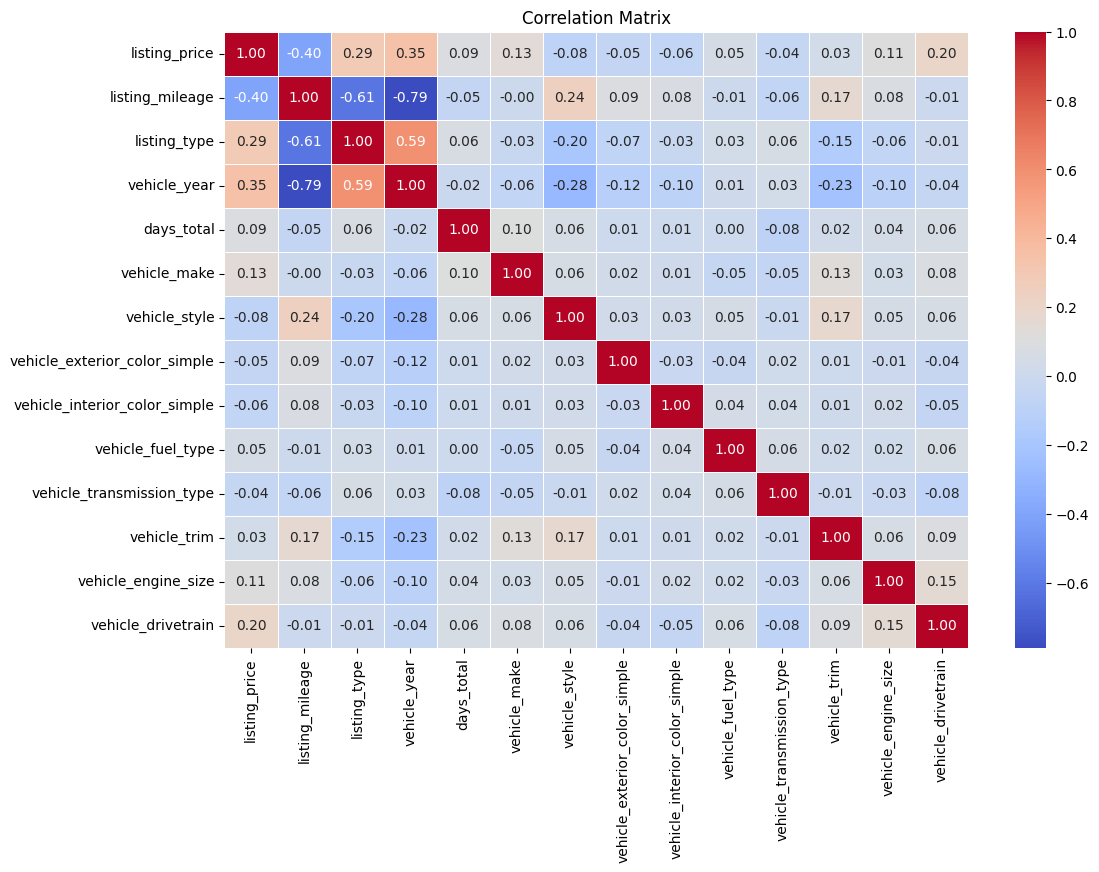

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check correlations
correlation_matrix = res_selected.dropna().corr()

# Visualize correlation matrix with heatmap105.0	2	2025	152	1	0	0	black	Gasoline	Automatic
# 2	42718.0	27.0	2	2025	89	2	1	0	other	Electric	
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


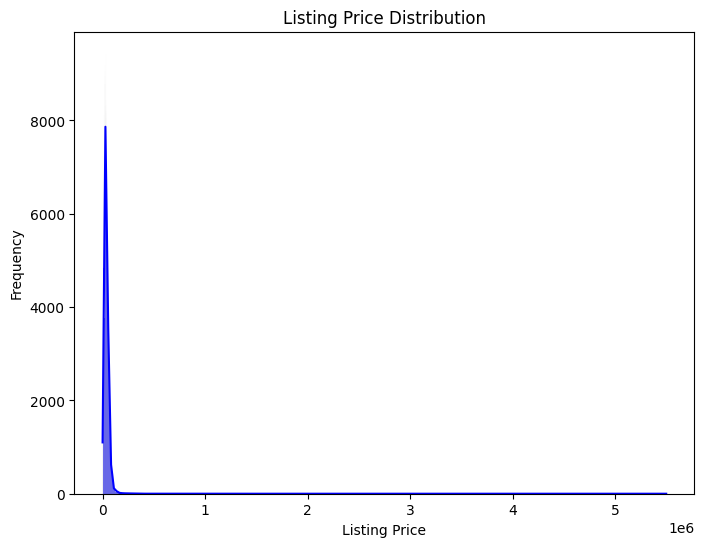

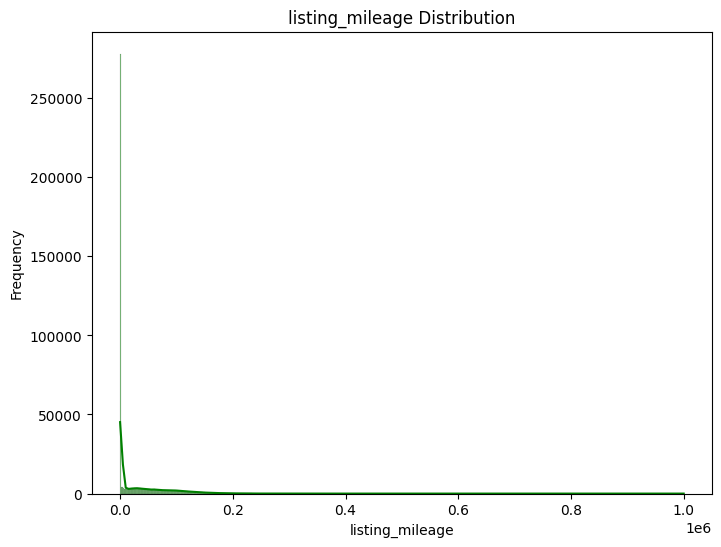

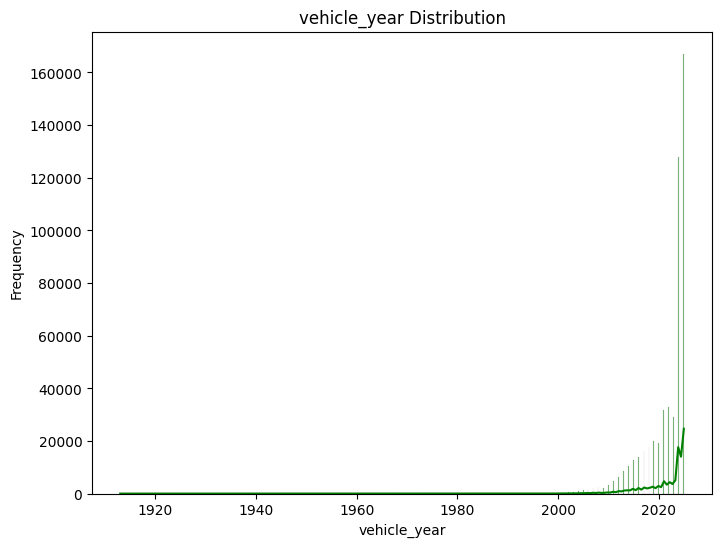

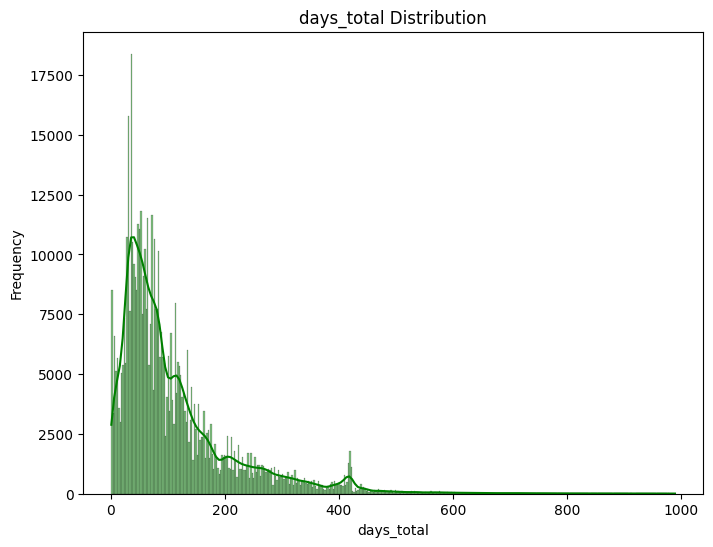

In [28]:
# Visualize the distribution of 'listing_price' (target variable)
plt.figure(figsize=(8, 6))
sns.histplot(res_selected['listing_price'], kde=True, color='blue')
plt.title('Listing Price Distribution')
plt.xlabel('Listing Price')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of numerical features
numerical_features = ['listing_mileage', 'vehicle_year', 'days_total']  # Add more numerical columns if needed
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(res_selected[feature], kde=True, color='green')
    plt.title(f'{feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


res_

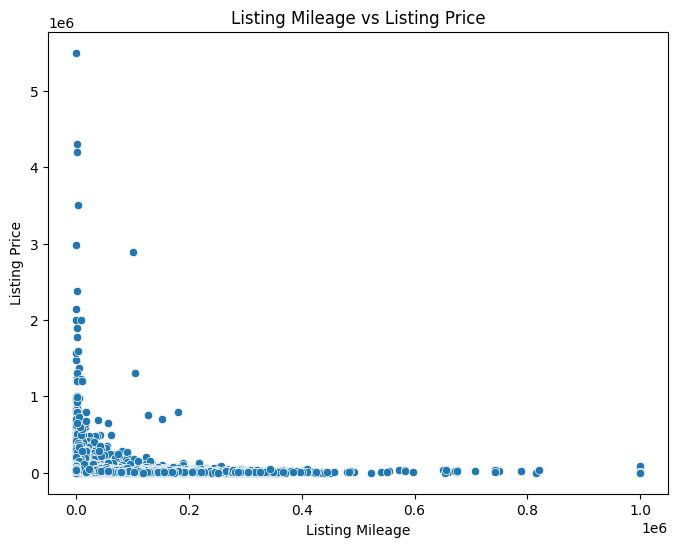

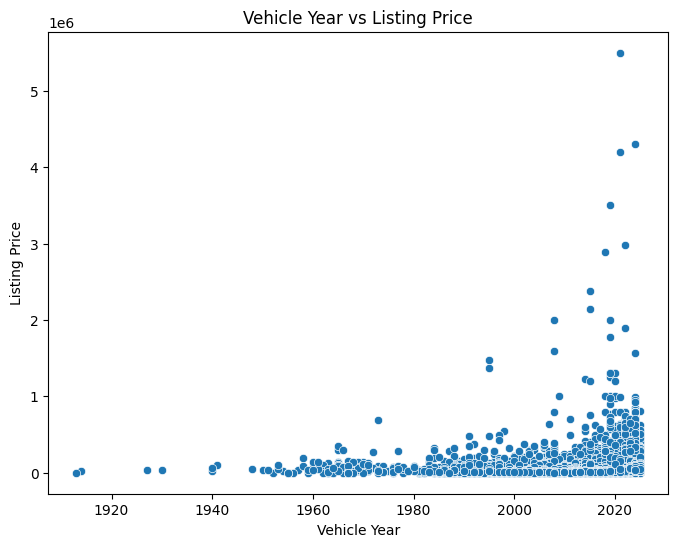

In [29]:
# Scatter plot between 'listing_mileage' and 'listing_price'
plt.figure(figsize=(8, 6))
sns.scatterplot(x=res_selected['listing_mileage'], y=res_selected['listing_price'])
plt.title('Listing Mileage vs Listing Price')
plt.xlabel('Listing Mileage')
plt.ylabel('Listing Price')
plt.show()

# Scatter plot between 'vehicle_year' and 'listing_price'
plt.figure(figsize=(8, 6))
sns.scatterplot(x=res_selected['vehicle_year'], y=res_selected['listing_price'])
plt.title('Vehicle Year vs Listing Price')
plt.xlabel('Vehicle Year')
plt.ylabel('Listing Price')
plt.show()


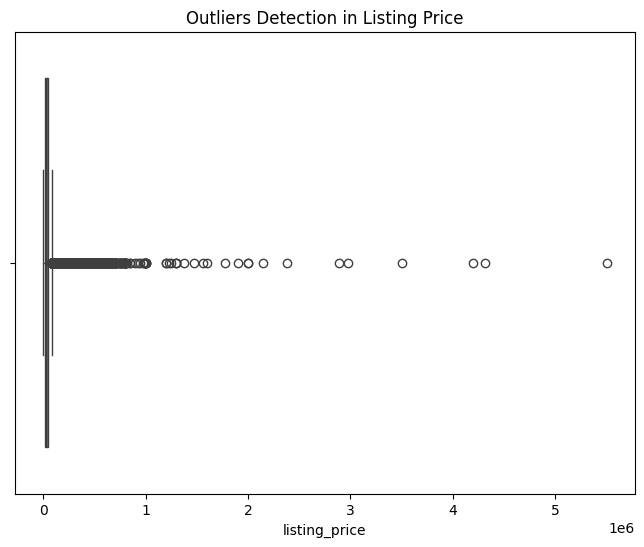

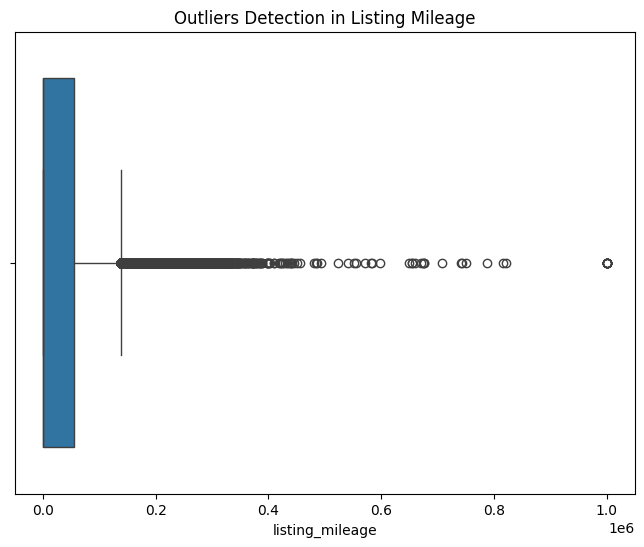

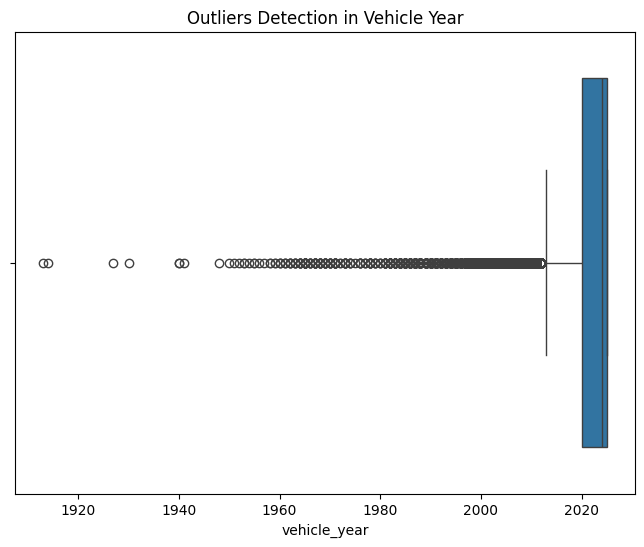

In [30]:
# Box plot to detect outliers in 'listing_price'
plt.figure(figsize=(8, 6))
sns.boxplot(x=res_selected['listing_price'])
plt.title('Outliers Detection in Listing Price')
plt.show()

# Box plot to detect outliers in 'listing_mileage'
plt.figure(figsize=(8, 6))
sns.boxplot(x=res_selected['listing_mileage'])
plt.title('Outliers Detection in Listing Mileage')
plt.show()

# Box plot to detect outliers in 'vehicle_year'
plt.figure(figsize=(8, 6))
sns.boxplot(x=res_selected['vehicle_year'])
plt.title('Outliers Detection in Vehicle Year')
plt.show()


In [31]:
## Function to remove outliers based on IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply the function to other numerical columns
res_selected = remove_outliers(res_selected, 'listing_price')
res_selected = remove_outliers(res_selected, 'listing_mileage')
res_selected = remove_outliers(res_selected, 'listing_type')
res_selected = remove_outliers(res_selected, 'vehicle_year')
res_selected = remove_outliers(res_selected, 'days_total')
res_selected = remove_outliers(res_selected, 'vehicle_make')
res_selected = remove_outliers(res_selected, 'vehicle_style')
res_selected = remove_outliers(res_selected, 'vehicle_exterior_color_simple')
res_selected = remove_outliers(res_selected, 'vehicle_interior_color_simple')
res_selected = remove_outliers(res_selected, 'vehicle_fuel_type')
res_selected = remove_outliers(res_selected, 'vehicle_transmission_type')
res_selected = remove_outliers(res_selected, 'vehicle_drivetrain')
res_selected = remove_outliers(res_selected, 'vehicle_engine_size')
res_selected = remove_outliers(res_selected, 'vehicle_trim')



In [32]:
# res_selected.isna().sum()# One-hot encode categorical features
# res_selected = pd.get_dummies(res_selected, columns=['vehicle_make', 'vehicle_style', 'vehicle_exterior_color_simple', 
#                                                      'vehicle_interior_color_simple', 'vehicle_fuel_type', 
#                                                      'vehicle_transmission_type'], drop_first=True)

from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = res_selected.drop(columns=['listing_price'])  # Exclude the target column
y = res_selected['listing_price']  # Target column

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [42]:
# !pip install xgboost


In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


# Predict on the test data
y_pred = rf_model.predict(X_test)


In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation results
# print(f"Mean Absolute Error: {mae}")
# print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


R² Score: 0.9194758344153213


In [40]:
import numpy as np

# Sample test data (same feature order as training data)
X_test_sample = np.array([
    [85940,	1,	2021,	30,	0,0,	0,	0,	0,	0,	0,	0,	0],
    [11870,	1,	2023,	21,	0,	4,	2,	2,	0,	0,	6,	3,	2],
    [102017,	1,	2016,	72,	5,	5,	3,	2,	0,	0,	7,	3,	1]
   
])


In [39]:
res_selected.head(5)

,listing_price,listing_mileage,listing_type,vehicle_year,days_total,vehicle_make,vehicle_style,vehicle_exterior_color_simple,vehicle_interior_color_simple,vehicle_fuel_type,vehicle_transmission_type,vehicle_trim,vehicle_engine_size,vehicle_drivetrain
0,18986.0,85940.0,1,2021,30,0,0,0,0,0,0,0,0,0
1,27800.0,105.0,2,2025,152,1,0,0,0,0,0,1,1,0
2,42718.0,27.0,2,2025,89,2,1,0,1,1,0,2,1,0
3,10126.0,67082.0,1,2020,122,3,0,1,0,0,0,3,1,0
4,38670.0,10.0,2,2024,118,3,2,1,1,2,0,4,2,1


In [41]:
# Predict prices using the trained model
predicted_prices = rf_model.predict(X_test_sample)

# Display the predictions
for i, price in enumerate(predicted_prices):
    print(f"Predicted price for test sample {i+1}: ${price:.2f}")


Predicted price for test sample 1: $19239.67
Predicted price for test sample 2: $49176.22
Predicted price for test sample 3: $14945.09


/home/admin1/Desktop/SmartAppraisal-TRPT/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [52]:
res_selected.head()

,listing_price,listing_mileage,listing_type,vehicle_year,days_total,vehicle_make,vehicle_style,vehicle_exterior_color_simple,vehicle_interior_color_simple,vehicle_fuel_type,vehicle_transmission_type,vehicle_trim,vehicle_engine_size,vehicle_drivetrain
0,18986.0,85940.0,1,2021,30,0,0,0,0,0,0,0,2,0
4,38670.0,10.0,2,2024,118,3,2,1,1,2,0,4,1,1
5,68225.0,12.0,2,2025,127,4,3,0,1,0,0,5,3,1
6,57442.0,11870.0,1,2023,21,0,4,2,2,0,0,6,3,2
7,13998.0,102017.0,1,2016,72,5,5,3,2,0,0,7,3,1


In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation results
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Absolute Error: 5439.7211819332715
Mean Squared Error: 67019638.72786978
R² Score: 0.7537451137257398


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search
grid_search.fit(X_train, y_train)

# Print the best parameters
print(f"Best Parameters: {grid_search.best_params_}")


In [ ]:
# Use the best model found by GridSearchCV
best_model = grid_search.best_estimator_

# Predict and evaluate the final model
y_pred_final = best_model.predict(X_test)

final_mae = mean_absolute_error(y_test, y_pred_final)
final_mse = mean_squared_error(y_test, y_pred_final)
final_r2 = r2_score(y_test, y_pred_final)

# Print final evaluation metrics
print(f"Final Mean Absolute Error: {final_mae}")
print(f"Final Mean Squared Error: {final_mse}")
print(f"Final R² Score: {final_r2}")


In [ ]:
# import jo# # Use the best model found by GridSearchCV
# best_model = grid_search.best_estimator_

# # Predict and evaluate the final model
# y_pred_final = best_model.predict(X_test)

# final_mae = mean_absolute_error(y_test, y_pred_final)
# final_mse = mean_squared_error(y_test, y_pred_final)
# final_r2 = r2_score(y_test, y_pred_final)

# # Print final evaluation metrics
# print(f"Final Mean Absolute Error: {final_mae}")
# print(f"Final Mean Squared Error: {final_mse}")
# print(f"Final R² Score: {final_r2}")
blib

# # Save the final model
# joblib.dump(best_model, '/home/admin1/Downloads/car_rental_price_predictor.pkl')

# # Load the model when needed
# loaded_model = joblib.load('/home/admin1/Downloads/car_rental_price_predictor.pkl')


In [ ]:
# from sklearn.feature_selection import VarianceThreshold
# # X = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]
# sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
# sel.fit_transform(X)

In [ ]:
# !pip install scikit-learn